In [4]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
tf.enable_eager_execution()
tf.VERSION

'1.12.0'

In [6]:
import pathlib

DATADIR = 'D:/257_data/labeling_data'
data_root = pathlib.Path(DATADIR)

In [7]:
for item in data_root.iterdir():
  print(item)

D:\257_data\labeling_data\Annotations
D:\257_data\labeling_data\Images


In [8]:
all_image_paths = list(data_root.glob('*/*/*/*/*.jpg'))
all_image_paths = [str(path) for path in all_image_paths]
# random.shuffle(all_image_paths)

all_xml_paths = list(data_root.glob('*/*/*/*/*.xml'))
all_xml_paths = [str(path) for path in all_xml_paths]
# random.shuffle(all_xml_paths)

image_count = len(all_image_paths)
xml_count = len(all_xml_paths)
image_count + xml_count

500

In [9]:
all_image_paths[:10] + all_xml_paths[:10]

['D:\\257_data\\labeling_data\\Images\\users\\kles90105\\257_data_set\\100p.jpg',
 'D:\\257_data\\labeling_data\\Images\\users\\kles90105\\257_data_set\\101p.jpg',
 'D:\\257_data\\labeling_data\\Images\\users\\kles90105\\257_data_set\\102p.jpg',
 'D:\\257_data\\labeling_data\\Images\\users\\kles90105\\257_data_set\\103p.jpg',
 'D:\\257_data\\labeling_data\\Images\\users\\kles90105\\257_data_set\\104p.jpg',
 'D:\\257_data\\labeling_data\\Images\\users\\kles90105\\257_data_set\\105p.jpg',
 'D:\\257_data\\labeling_data\\Images\\users\\kles90105\\257_data_set\\106p.jpg',
 'D:\\257_data\\labeling_data\\Images\\users\\kles90105\\257_data_set\\107p.jpg',
 'D:\\257_data\\labeling_data\\Images\\users\\kles90105\\257_data_set\\108p.jpg',
 'D:\\257_data\\labeling_data\\Images\\users\\kles90105\\257_data_set\\109p.jpg',
 'D:\\257_data\\labeling_data\\Annotations\\users\\kles90105\\257_data_set\\100p.xml',
 'D:\\257_data\\labeling_data\\Annotations\\users\\kles90105\\257_data_set\\101p.xml',
 'D:\\

In [10]:
import IPython.display as display

def caption_image(image_path):
    image_rel = pathlib.Path(image_path).relative_to(data_root)
    return image_rel
    

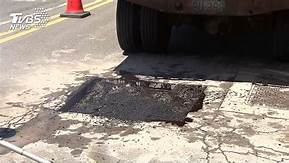

Images\users\kles90105\257_data_set\23p.jpg


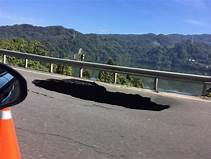

Images\users\kles90105\257_data_set\19p.jpg


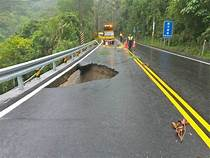

Images\users\kles90105\257_data_set\115p.jpg


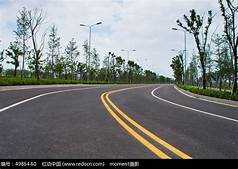

Images\users\kles90105\257_data_set\34n.jpg


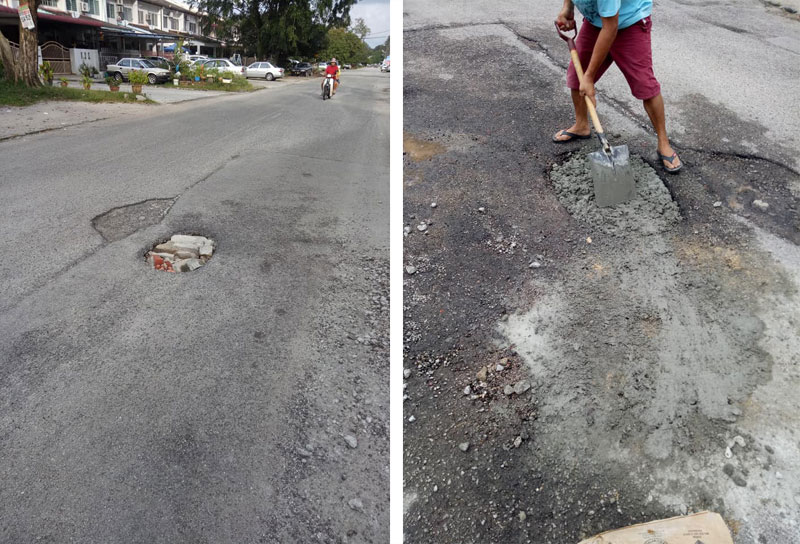

Images\users\kles90105\257_data_set\145p.jpg


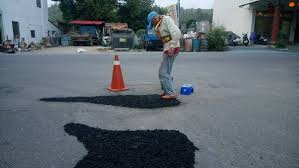

Images\users\kles90105\257_data_set\142p.jpg


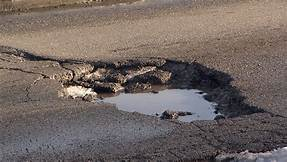

Images\users\kles90105\257_data_set\156p.jpg


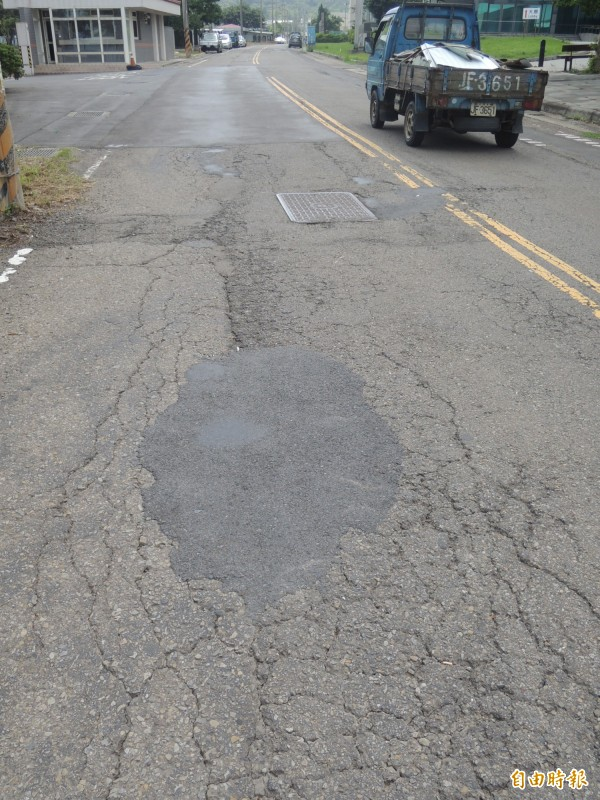

Images\users\kles90105\257_data_set\127p.jpg


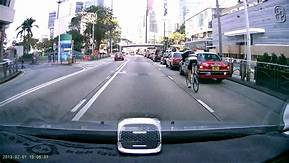

Images\users\kles90105\257_data_set\61n.jpg


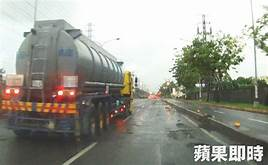

Images\users\kles90105\257_data_set\16p.jpg


In [11]:
import random

for n in range(10):
  image_path = random.choice(all_image_paths)
  display.display(display.Image(image_path))
  print(caption_image(image_path))

In [8]:
label_names = sorted(item.name for item in data_root.glob('*/') if item.is_dir())
label_names

['Annotations', 'Images']

In [11]:
import xml.etree.ElementTree as ET
import numpy as np
from array import *
from PIL import Image
import uuid

def xml_tree(x):
    for child in x:
        if(child.getchildren() == []):
            print(child.tag, ":", child.text)
        else:
            print(child.tag)
            xml_tree(child)

for i in range(len(all_image_paths)):
    tree = ET.parse(all_xml_paths[i])
    root = tree.getroot()
    xml_tree(root)
    print("")

    objs = root.findall("./object")

    url = 'D:/257_data/labeling_data/Images/users/kles90105/257_data_set/' + root.find("./filename").text

    x_list = []
    y_list = []
    i = 0
    for co in objs:
        print(co.find("./name").text)
        for node in co.findall("./polygon/pt"):
            print("point")
            children = node.getchildren()
            x = children[0].text
            y = children[1].text
            x_list.append(int(float(x)))
            y_list.append(int(float(y)))
            print(int(float(x)), int(float(y)))
        print("top-left", min(x_list), min(y_list))
        print("bottom-right", max(x_list), max(y_list))
        print()
    
        im = Image.open(url) 
        outfile = 'training-objects/%s-%s.png' % (str(co.find("./name").text), str(uuid.uuid4()))
        im.crop((min(x_list), min(y_list), max(x_list), max(y_list))).resize((640, 640)).save(outfile)
        print("Save as:", outfile)
        print()
        
        x_list = []
        y_list = []
    

filename : 100p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 167
ncols : 250
object
name : pothole4
deleted : 0
verified : 0
occluded : yes
attributes : None
parts
hasparts : None
ispartof : None
date : 05-Apr-2019 20:01:53
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 25
y : 128
pt
x : 137
y : 128
pt
x : 137
y : 160
pt
x : 25
y : 160

pothole4
point
25 128
point
137 128
point
137 160
point
25 160
top-left 25 128
bottom-right 137 160

Save as: training-objects/pothole4-b6641795-9c2b-498c-9012-320b434dbd32.png

filename : 101p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 167
ncols : 225
object
name : pothole4
deleted : 0
verified : 0
occluded : yes
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 05:33:40
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 68
y : 57
pt
x : 138
y : 57
pt
x : 138
y : 121
pt
x : 68
y : 121

pothole4
point
68 

Save as: training-objects/pothole1-c0a027b3-3cc7-4a02-92be-bcf113a9fbb2.png

filename : 110p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 151
ncols : 226
object
name : pothole4
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 05:36:11
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 32
y : 63
pt
x : 208
y : 63
pt
x : 208
y : 137
pt
x : 32
y : 137

pothole4
point
32 63
point
208 63
point
208 137
point
32 137
top-left 32 63
bottom-right 208 137

Save as: training-objects/pothole4-7bbb5138-2db3-4b91-a08c-99b50094de34.png

filename : 111p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 161
ncols : 209
object
name : pothole1
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 05-Apr-2019 20:04:47
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 88
y : 71
pt
x

hasparts : None
ispartof : None
date : 21-Mar-2019 05:42:04
id : 14
type : bounding_box
polygon
username : Bert
pt
x : 134
y : 111
pt
x : 151
y : 111
pt
x : 151
y : 116
pt
x : 134
y : 116
object
name : pothole3
deleted : 0
verified : 0
occluded : yes
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 05:42:24
id : 15
polygon
username : Bert
pt
x : 89
y : 157
pt
x : 125
y : 120
pt
x : 156
y : 121
pt
x : 156
y : 156

pothole3
point
108 4
point
132 4
point
132 13
point
108 13
top-left 108 4
bottom-right 132 13

Save as: training-objects/pothole3-2c4c8aee-c75d-4c32-b9a2-2a1a590fd2d6.png

pothole3
point
73 6
point
95 6
point
95 14
point
73 14
top-left 73 6
bottom-right 95 14

Save as: training-objects/pothole3-bea486c7-253a-4054-8a80-14ceb93aadb0.png

pothole3
point
83 16
point
98 16
point
98 24
point
83 24
top-left 83 16
bottom-right 98 24

Save as: training-objects/pothole3-bb9dfd46-83e6-4c7d-a3aa-e19393091c7f.png

pothole3
point
87 33
point
120 33
point
120 23
poi

75 94
point
63 100
point
53 98
top-left 53 89
bottom-right 75 100

Save as: training-objects/pothole1-0d0d651c-6131-4720-9012-500672f91bd5.png

pothole2
point
122 78
point
102 68
point
97 69
point
90 64
point
102 63
point
109 66
point
123 68
point
128 72
top-left 90 63
bottom-right 128 78

Save as: training-objects/pothole2-4b4c0c25-a03c-47e8-8a73-9d0e473f80a5.png

filename : 120p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 150
ncols : 200
object
name : pothole4
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 05-Apr-2019 20:05:54
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 104
y : 74
pt
x : 78
y : 74
pt
x : 78
y : 65
pt
x : 104
y : 65

pothole4
point
104 74
point
78 74
point
78 65
point
104 65
top-left 78 65
bottom-right 104 74

Save as: training-objects/pothole4-91428e19-e897-4851-909d-e4b0307ea994.png

filename : 121p.jpg
folder : users/kles90105//257_data_set
sou


pothole1
point
77 27
point
151 11
point
164 15
point
87 32
top-left 77 11
bottom-right 164 32

Save as: training-objects/pothole1-8882486c-5b02-4641-bab3-0de97641af18.png

pothole0
point
271 56
point
295 56
point
295 78
point
271 78
top-left 271 56
bottom-right 295 78

Save as: training-objects/pothole0-a1b20a71-e9c3-4409-ba98-c6756c6b3a1e.png

filename : 130p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 161
ncols : 256
object
name : pothole4
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 05:48:37
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 31
y : 101
pt
x : 85
y : 101
pt
x : 85
y : 137
pt
x : 31
y : 137

pothole4
point
31 101
point
85 101
point
85 137
point
31 137
top-left 31 101
bottom-right 85 137

Save as: training-objects/pothole4-8d8f5488-f71b-4e6f-a402-bbfa6e68c178.png

filename : 131p.jpg
folder : users/kles90105//257_data_set
source
submittedBy

Save as: training-objects/pothole3-dfe3690e-c518-41ec-be9b-300a63e91f56.png

pothole1
point
35 65
point
134 65
point
134 125
point
35 125
top-left 35 65
bottom-right 134 125

Save as: training-objects/pothole1-16c403df-335e-4e8a-91c7-edee8ed8be72.png

pothole2
point
205 118
point
296 118
point
296 164
point
205 164
top-left 205 118
bottom-right 296 164

Save as: training-objects/pothole2-b53161bd-0fe9-4bac-b72b-349ba7c5d4ff.png

filename : 13n.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 153
ncols : 273
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 06:03:34
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 34
y : 118
pt
x : 116
y : 118
pt
x : 116
y : 142
pt
x : 34
y : 142

pothole0
point
34 118
point
116 118
point
116 142
point
34 142
top-left 34 118
bottom-right 116 142

Save as: training-objects/pothole0-b9d23689-4156-4f59-94d1-709ee8

Save as: training-objects/pothole2-0054184c-6c1b-49fc-92ae-dbd7c5d52616.png

pothole3
point
134 222
point
225 222
point
225 280
point
134 280
top-left 134 222
bottom-right 225 280

Save as: training-objects/pothole3-420e8b88-d51a-4a00-b376-28b4161751df.png

pothole2
point
545 143
point
695 143
point
695 253
point
545 253
top-left 545 143
bottom-right 695 253

Save as: training-objects/pothole2-fd031a4f-e350-4f0d-80bb-f8a07e4ffec5.png

filename : 146p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 202
ncols : 250
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 05-Apr-2019 20:11:44
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 98
y : 96
pt
x : 217
y : 96
pt
x : 217
y : 111
pt
x : 98
y : 111
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 05-Apr-2019 20:11:54
id : 1
type : bo

filename : 155p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 162
ncols : 241
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 05-Apr-2019 20:14:14
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 111
y : 120
pt
x : 162
y : 120
pt
x : 162
y : 149
pt
x : 111
y : 149
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 05-Apr-2019 20:14:17
id : 1
type : bounding_box
polygon
username : Bert
pt
x : 113
y : 74
pt
x : 159
y : 74
pt
x : 159
y : 93
pt
x : 113
y : 93
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 05-Apr-2019 20:14:23
id : 2
type : bounding_box
polygon
username : Bert
pt
x : 174
y : 71
pt
x : 136
y : 71
pt
x : 136
y : 61
pt
x : 174
y : 61
object
name : pothole3
deleted : 0
verified : 0
occluded : 

Save as: training-objects/pothole3-fefee26e-f276-40eb-9d60-888777a6e999.png

pothole1
point
2 100
point
175 100
point
175 150
point
2 150
top-left 2 100
bottom-right 175 150

Save as: training-objects/pothole1-351881c2-3289-45e0-b236-66f6d4044ffd.png

filename : 160p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 163
ncols : 205
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 05:58:34
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 17
y : 30.999999999999986
pt
x : 187
y : 30.999999999999986
pt
x : 187
y : 139
pt
x : 17
y : 139

pothole3
point
17 30
point
187 30
point
187 139
point
17 139
top-left 17 30
bottom-right 187 139

Save as: training-objects/pothole3-af83e0bb-ad8b-4ea1-9a75-bb00984925cc.png

filename : 161p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 300
ncols : 227
object
name

Save as: training-objects/pothole1-5763f891-9a2e-4af6-87cc-f66ad5fba3db.png

filename : 16n.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 164
ncols : 261
object
name : pothole0
deleted : 0
verified : 0
occluded : yes
attributes : steel plate
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 06:04:07
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 9
y : 90
pt
x : 249
y : 90
pt
x : 249
y : 164
pt
x : 9
y : 164

pothole0
point
9 90
point
249 90
point
249 164
point
9 164
top-left 9 90
bottom-right 249 164

Save as: training-objects/pothole0-20e8aeaf-3521-434a-838e-ce83c5c35eb3.png

filename : 16p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 165
ncols : 268
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 04:39:47
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 165
y : 

point
169 73
point
120 73
top-left 120 59
bottom-right 169 73

Save as: training-objects/pothole0-945df123-c367-4753-aac4-ea7a4b2708e9.png

pothole0
point
78 91
point
209 91
point
209 149
point
78 149
top-left 78 91
bottom-right 209 149

Save as: training-objects/pothole0-4e137f80-1baa-48ec-8b2f-83e7aaba7c75.png

filename : 17p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 300
ncols : 226
object
name : pothole4
deleted : 0
verified : 0
occluded : yes
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 04:40:03
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 22
y : 172
pt
x : 187
y : 172
pt
x : 187
y : 221
pt
x : 22
y : 221

pothole4
point
22 172
point
187 172
point
187 221
point
22 221
top-left 22 172
bottom-right 187 221

Save as: training-objects/pothole4-1308349b-afd2-4bcb-bb21-243a9104eefc.png

filename : 18n.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
image

Save as: training-objects/pothole4-19c9b239-bce5-445a-8451-27c6c3a5e357.png

pothole4
point
315 197
point
594 197
point
594 399
point
315 399
top-left 315 197
bottom-right 594 399

Save as: training-objects/pothole4-cefe9ea9-a77d-4065-b397-f69b35c627fe.png

filename : 22n.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 300
ncols : 169
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : cone
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 06:09:02
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 10
y : 117
pt
x : 35
y : 117
pt
x : 35
y : 152
pt
x : 10
y : 152
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : cone
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 06:09:10
id : 1
type : bounding_box
polygon
username : Bert
pt
x : 60
y : 162
pt
x : 33
y : 162
pt
x : 33
y : 120
pt
x : 60
y : 120

pothole0
point
10 117
point
35 117
point
35 152
point
10 152
top-left 10 1

Save as: training-objects/pothole1-723833e0-021a-4a59-b2cc-b7818202566d.png

pothole1
point
223 41
point
280 41
point
280 95
point
223 95
top-left 223 41
bottom-right 280 95

Save as: training-objects/pothole1-31fbefae-a9b9-4bd7-9fc9-b9cc5aa7cf22.png

filename : 27n.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 165
ncols : 219
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 06:09:53
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 21
y : 60
pt
x : 175
y : 60
pt
x : 175
y : 116
pt
x : 21
y : 116

pothole0
point
21 60
point
175 60
point
175 116
point
21 116
top-left 21 60
bottom-right 175 116

Save as: training-objects/pothole0-33a25d78-c4b0-47d9-bb10-adcb4052ef87.png

filename : 27p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 300
ncols : 226
object
name : pothole4
deleted : 0
verified :

pt
x : 126
y : 85
pt
x : 184
y : 85
pt
x : 184
y : 159
pt
x : 126
y : 159

pothole0
point
126 85
point
184 85
point
184 159
point
126 159
top-left 126 85
bottom-right 184 159

Save as: training-objects/pothole0-ec9c5947-1137-4b3c-818a-b04ece997a5b.png

filename : 31p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 173
ncols : 230
object
name : pothole2
deleted : 0
verified : 0
occluded : yes
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 04:57:18
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 72
y : 84
pt
x : 151
y : 84
pt
x : 151
y : 128
pt
x : 72
y : 128

pothole2
point
72 84
point
151 84
point
151 128
point
72 128
top-left 72 84
bottom-right 151 128

Save as: training-objects/pothole2-1aca0238-b44a-44f0-a7e5-8f629b6735e3.png

filename : 32n.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 158
ncols : 242
object
name : pothole0
deleted : 0
ver

Save as: training-objects/pothole0-a247ae6c-c6a8-4cee-baf2-52e28ca7f883.png

filename : 36p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 155
ncols : 206
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 04:58:43
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 28
y : 97
pt
x : 106
y : 97
pt
x : 106
y : 115
pt
x : 28
y : 115

pothole2
point
28 97
point
106 97
point
106 115
point
28 115
top-left 28 97
bottom-right 106 115

Save as: training-objects/pothole2-4f101b15-b06e-41e4-89c2-4730b27bb4af.png

filename : 37n.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 157
ncols : 279
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 06:11:41
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 50
y : 70
p

filename : 42n.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 169
ncols : 301
object
name : pothole0
deleted : 0
verified : 0
occluded : yes
attributes : None
parts
hasparts : None
ispartof : None
date : 05-Apr-2019 20:22:27
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 101
y : 81
pt
x : 221
y : 81
pt
x : 221
y : 152
pt
x : 101
y : 152

pothole0
point
101 81
point
221 81
point
221 152
point
101 152
top-left 101 81
bottom-right 221 152

Save as: training-objects/pothole0-91e5701b-6a97-4d17-8ec9-c70027681119.png

filename : 42p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 287
ncols : 510
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 05-Apr-2019 19:56:27
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 133
y : 132
pt
x : 442
y : 132
pt
x : 442
y : 211
pt
x : 133
y : 211

pothole2
point
13

filename : 48p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 338
ncols : 600
object
name : pothole4
deleted : 0
verified : 0
occluded : yes
attributes : None
parts
hasparts : None
ispartof : None
date : 05-Apr-2019 19:57:25
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 580
y : 31
pt
x : 64
y : 31
pt
x : 64
y : 336
pt
x : 580
y : 336

pothole4
point
580 31
point
64 31
point
64 336
point
580 336
top-left 64 31
bottom-right 580 336

Save as: training-objects/pothole4-c44994af-17f9-45c7-bce5-4fe039d951b3.png

filename : 49n.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 179
ncols : 267
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 05-Apr-2019 20:23:20
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 46
y : 67
pt
x : 227
y : 67
pt
x : 227
y : 159
pt
x : 46
y : 159

pothole0
point
46 67
point

84 122
point
3 122
top-left 3 84
bottom-right 84 122

Save as: training-objects/pothole1-9c22b28b-a159-4188-9221-c2a0689a20f4.png

pothole1
point
91 105
point
153 105
point
153 124
point
91 124
top-left 91 105
bottom-right 153 124

Save as: training-objects/pothole1-86297aff-eff9-4e88-a866-8b5990329b72.png

pothole1
point
162 80
point
200 80
point
200 128
point
162 128
top-left 162 80
bottom-right 200 128

Save as: training-objects/pothole1-bd969675-3d31-45ac-b959-9276fad0549b.png

pothole2
point
143 16
point
175 16
point
175 30
point
143 30
top-left 143 16
bottom-right 175 30

Save as: training-objects/pothole2-13fa1bfb-c106-45fa-96ca-cee00cc31d39.png

pothole2
point
98 21
point
125 21
point
125 34
point
98 34
top-left 98 21
bottom-right 125 34

Save as: training-objects/pothole2-3e07ecef-d41f-425c-a7a8-745406d18dff.png

pothole2
point
79 14
point
98 14
point
98 29
point
79 29
top-left 79 14
bottom-right 98 29

Save as: training-objects/pothole2-1de801e7-cd02-458c-a064-ab4df1b2e86a.pn

Save as: training-objects/pothole0-01f97ff0-e341-4f9b-b321-13c700ece36f.png

filename : 56p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 160
ncols : 251
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 18-Apr-2019 18:47:13
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 15
y : 101
pt
x : 45
y : 101
pt
x : 45
y : 110
pt
x : 15
y : 110
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 18-Apr-2019 18:47:17
id : 1
type : bounding_box
polygon
username : Bert
pt
x : 51
y : 110
pt
x : 71
y : 110
pt
x : 71
y : 120
pt
x : 51
y : 120
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 18-Apr-2019 18:47:22
id : 2
type : bounding_box
polygon
username : Bert
pt
x : 74
y : 113
pt
x : 100
y : 113
pt
x : 100
y : 123
pt


filename : 5p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 155
ncols : 216
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 19:25:45
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 5
y : 62
pt
x : 89
y : 62
pt
x : 89
y : 102
pt
x : 5
y : 102
object
name : pothole2
deleted : 1
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 19:25:52
id : 1
type : bounding_box
polygon
username : Bert
pt
x : 14
y : 9
pt
x : 201
y : 9
pt
x : 201
y : 116
pt
x : 14
y : 116
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 19:25:58
id : 2
type : bounding_box
polygon
username : Bert
pt
x : 128
y : 62
pt
x : 140
y : 62
pt
x : 140
y : 73
pt
x : 128
y : 73
object
name : pothole1
deleted : 0
verified : 0
occluded : yes
attribut

Save as: training-objects/pothole0-c713237a-b67c-454c-9cd2-4537ec85d80d.png

filename : 63p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 176
ncols : 255
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 05-Apr-2019 19:58:26
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 111
y : 98
pt
x : 200
y : 98
pt
x : 200
y : 144
pt
x : 111
y : 144
object
name : pothole1
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 05-Apr-2019 19:58:31
id : 1
type : bounding_box
polygon
username : Bert
pt
x : 207
y : 42
pt
x : 232
y : 42
pt
x : 232
y : 67
pt
x : 207
y : 67

pothole2
point
111 98
point
200 98
point
200 144
point
111 144
top-left 111 98
bottom-right 200 144

Save as: training-objects/pothole2-e8e80137-8ad4-4d01-9eef-55bb0169cdca.png

pothole1
point
207 42
point
232 42
point
232 67
point
207 67
top-left 207 4

filename : 70n.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 165
ncols : 219
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : sewer cover
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 06:06:17
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 14
y : 5
pt
x : 208
y : 5
pt
x : 208
y : 153
pt
x : 14
y : 153

pothole0
point
14 5
point
208 5
point
208 153
point
14 153
top-left 14 5
bottom-right 208 153

Save as: training-objects/pothole0-fd9fabeb-90d2-448d-923a-034dfc815c02.png

filename : 70p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 225
ncols : 500
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 05:16:37
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 25
y : 162
pt
x : 118
y : 162
pt
x : 118
y : 223
pt
x : 25
y : 223
object
name : pothole3
d

point
205 184
point
125 184
top-left 125 168
bottom-right 205 184

Save as: training-objects/pothole0-ef4a6586-97a2-4816-ad41-b3d05785b78a.png

filename : 76p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 300
ncols : 200
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 05:18:25
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 19
y : 198
pt
x : 115
y : 198
pt
x : 115
y : 260
pt
x : 19
y : 260
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 05:18:29
id : 1
type : bounding_box
polygon
username : Bert
pt
x : 98
y : 121
pt
x : 114
y : 121
pt
x : 114
y : 130
pt
x : 98
y : 130
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 05:18:34
id : 2
type : bounding_box
polygon
user

Save as: training-objects/pothole2-f2bae81b-92ea-47fd-bd94-68502b5d0732.png

pothole3
point
341 148
point
401 148
point
401 174
point
341 174
top-left 341 148
bottom-right 401 174

Save as: training-objects/pothole3-932286bc-7acd-4818-9760-0189594d9c43.png

pothole2
point
352 188
point
365 188
point
365 211
point
352 211
top-left 352 188
bottom-right 365 211

Save as: training-objects/pothole2-fe8e6dd8-f1c5-45df-97ae-b4bdfc9f0423.png

pothole1
point
365 130
point
436 130
point
436 152
point
365 152
top-left 365 130
bottom-right 436 152

Save as: training-objects/pothole1-c7d2aad7-2d51-4dc4-a7c9-b9473697b545.png

pothole1
point
112 279
point
219 279
point
219 346
point
112 346
top-left 112 279
bottom-right 219 346

Save as: training-objects/pothole1-ae553468-f655-4a59-bb0d-70a4ff438f8e.png

filename : 82p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 596
ncols : 1060
object
name : pothole4
deleted : 0
verified : 0
occluded : no
attribu

filename : 8p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 173
ncols : 221
object
name : pothole2
deleted : 0
verified : 0
occluded : yes
attributes : None
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 19:29:07
id : 0
polygon
username : Bert
pt
x : 104
y : 172
pt
x : 119
y : 165
pt
x : 127
y : 156
pt
x : 131
y : 142
pt
x : 134
y : 133
pt
x : 138
y : 127
pt
x : 153
y : 125
pt
x : 164
y : 121
pt
x : 175
y : 121
pt
x : 183
y : 121
pt
x : 193
y : 122
pt
x : 194
y : 123
pt
x : 197
y : 126
pt
x : 201
y : 128
pt
x : 200
y : 132
pt
x : 192
y : 135
pt
x : 185
y : 140
pt
x : 182
y : 146
pt
x : 186
y : 150
pt
x : 183
y : 160
pt
x : 190
y : 166
pt
x : 190
y : 170
pt
x : 190
y : 173

pothole2
point
104 172
point
119 165
point
127 156
point
131 142
point
134 133
point
138 127
point
153 125
point
164 121
point
175 121
point
183 121
point
193 122
point
194 123
point
197 126
point
201 128
point
200 132
point
192 135
point
185 140
point
182

filename : 9p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 173
ncols : 308
object
name : pothole4
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 19:30:54
id : 0
polygon
username : Bert
pt
x : 116
y : 75
pt
x : 122
y : 79
pt
x : 135
y : 79
pt
x : 150
y : 74
pt
x : 170
y : 71
pt
x : 180
y : 70
pt
x : 189
y : 68
pt
x : 203
y : 66
pt
x : 228
y : 71
pt
x : 246
y : 86
pt
x : 254
y : 93
pt
x : 251
y : 100
pt
x : 244
y : 108
pt
x : 240
y : 111
pt
x : 231
y : 117
pt
x : 210
y : 118
pt
x : 197
y : 121
pt
x : 182
y : 123
pt
x : 168
y : 118
pt
x : 156
y : 117
pt
x : 143
y : 118
pt
x : 125
y : 114
pt
x : 115
y : 106
pt
x : 108
y : 90

pothole4
point
116 75
point
122 79
point
135 79
point
150 74
point
170 71
point
180 70
point
189 68
point
203 66
point
228 71
point
246 86
point
254 93
point
251 100
point
244 108
point
240 111
point
231 117
point
210 118
point
197 121
point
182 123


pothole0


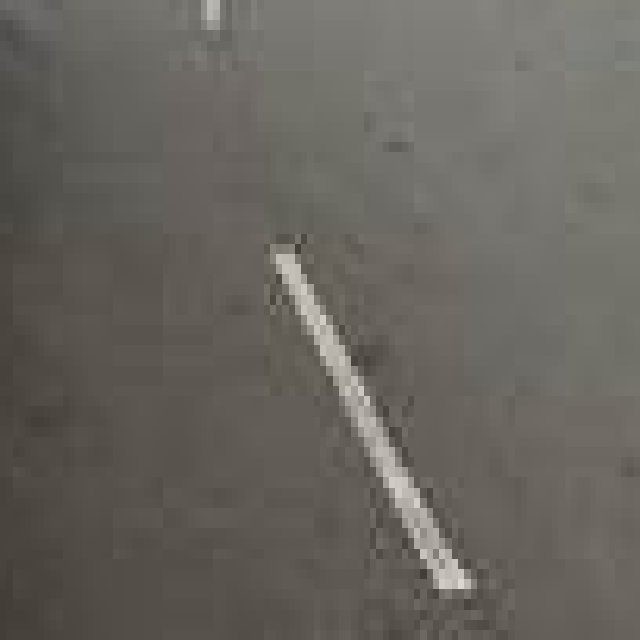

pothole0


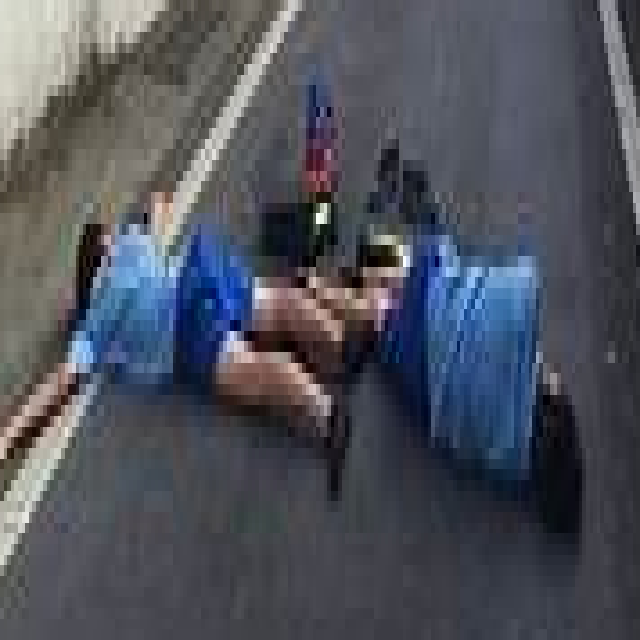

pothole0


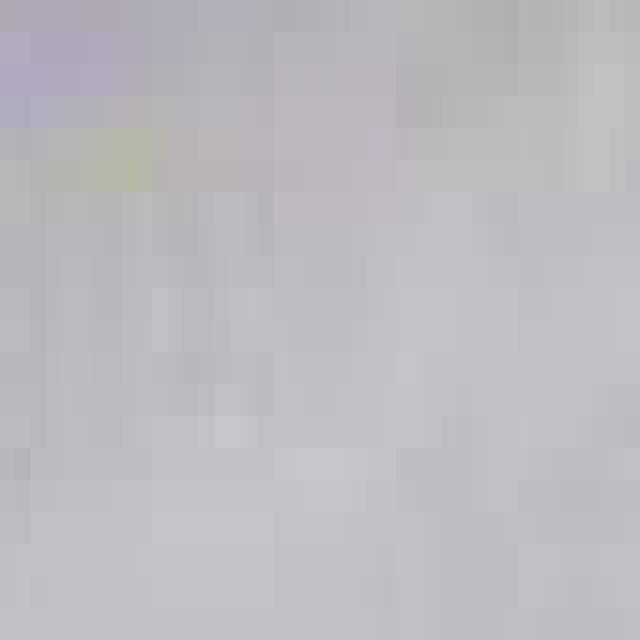

pothole0


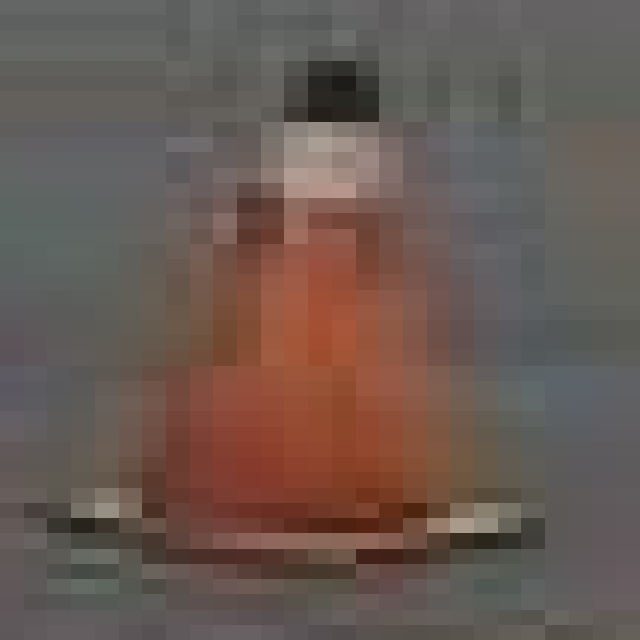

pothole0


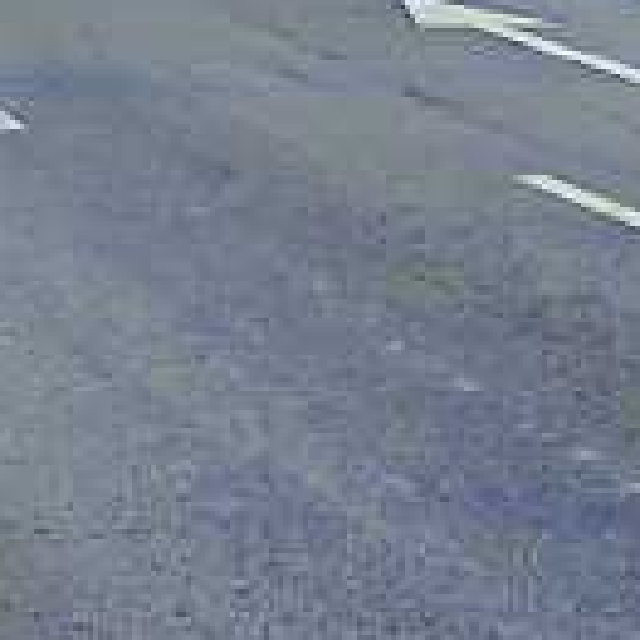

pothole0


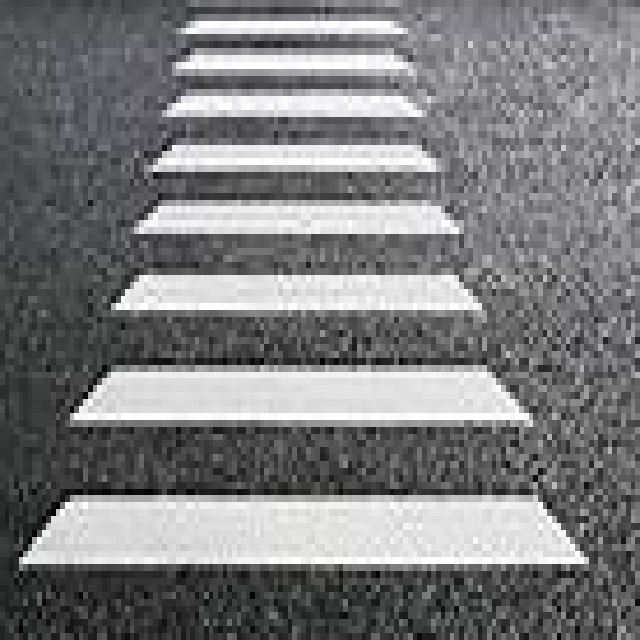

pothole0


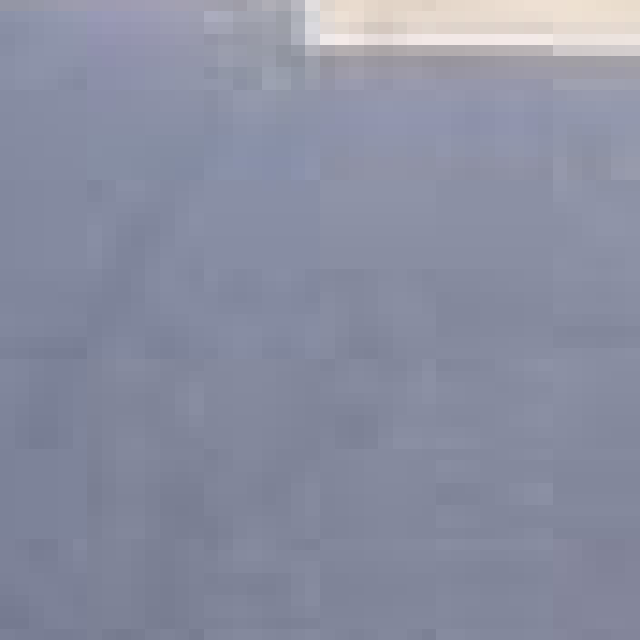

pothole0


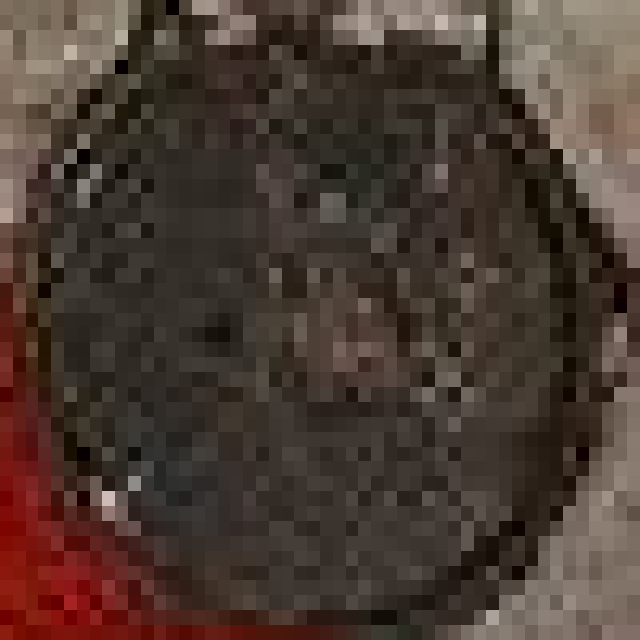

pothole0


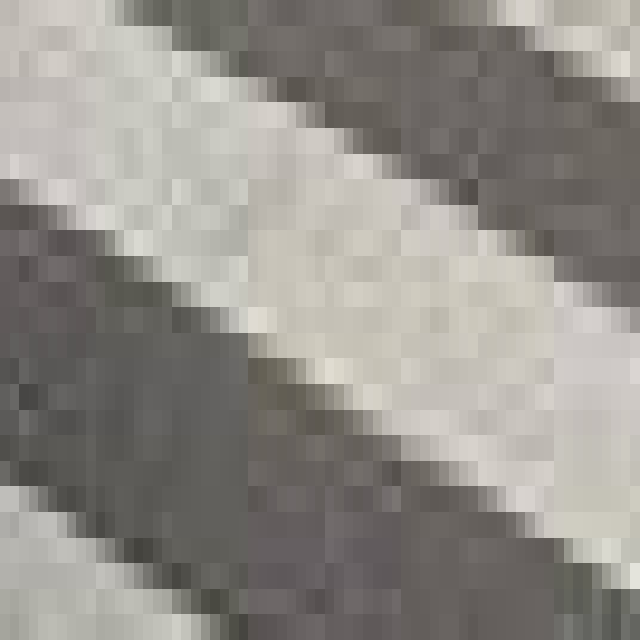

pothole0


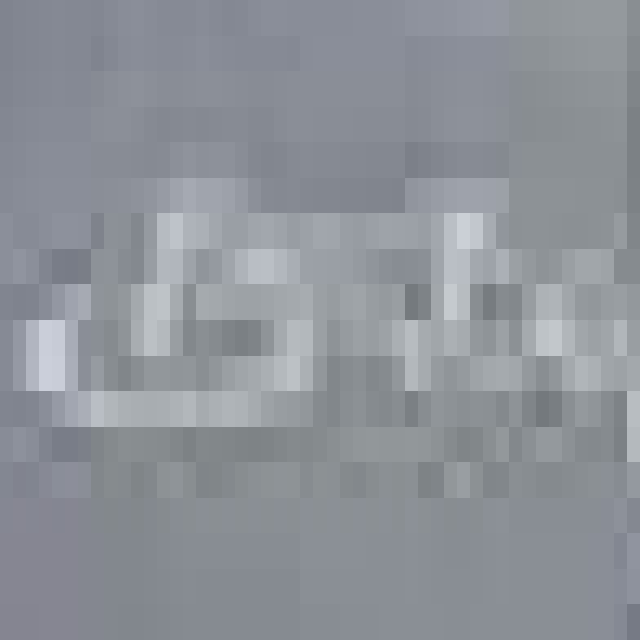

In [34]:
import pathlib
import IPython.display as display
from PIL import Image
import os


data_root = pathlib.Path('C:/Users/kles9/Desktop/CmpE257/CmpE257_team_project')
training_objs = list(data_root.glob('*/*.png'))
training_objs = [str(path) for path in training_objs]

# im = Image.open(training_objs[0])
for i in range(10):
    print(os.path.basename(training_objs[i])[0:8])
    display.display(display.Image(training_objs[i]))
    caption_image(training_objs[i])
#     print(caption_image(training_objs[i])[0: 1])
#     im = Image.open(training_objs[i])
#     print(im.filename)